In [420]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

In [421]:
# Files to load
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

In [422]:
# Get the data types of each column.
city_data_df.dtypes

city            object
driver_count     int64
type            object
dtype: object

In [423]:
# Get the unique values of the type of city.
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [424]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])


In [425]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
# Create the Suburban and Rural city DataFrames.
suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


In [426]:
# Get the number of rides for urban cities.
urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
# Create the suburban and rural ride count.
suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


In [427]:
#Merged Data Total Rides

city_type_ride_count = pyber_data_df.groupby(["type"]).count()["driver_count"]


In [428]:
# Get average fare for each city in the urban cities.
urban_avg_fare = urban_cities_df.groupby(["city"]).mean()["fare"]
# Get average fare for each city in the suburban and rural cities.
suburban_avg_fare = suburban_cities_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_cities_df.groupby(["city"]).mean()["fare"]


In [429]:
#Merged Data average Fare per ride

city_type_avg_fare = pyber_data_df.groupby(["type"]).mean()["fare"]

In [430]:
# Get total Fare for each city type
urban_total_fare = urban_cities_df.sum()["fare"]
suburban_total_fare = suburban_cities_df.sum()["fare"]
rural_total_fare = rural_cities_df.sum()["fare"]

#Merged data total fare

city_type_total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]


In [431]:
# Get the average number of drivers for each urban city.
urban_driver_count = urban_cities_df.groupby(["city"]).mean()["driver_count"]
# Get the average number of drivers for each city for the suburban and rural cities.
suburban_driver_count = suburban_cities_df.groupby(["city"]).mean()["driver_count"]
rural_driver_count = rural_cities_df.groupby(["city"]).mean()["driver_count"]


In [432]:
#Get Total number of drivers
urban_total_drivers = urban_driver_count.sum()
suburban_total_drivers = suburban_driver_count.sum()
rural_total_drivers = rural_driver_count.sum()

#Merged data total number of drivers

city_type_total_drivers = pyber_data_df.groupby(["type"]).sum()["driver_count"]



In [433]:
#Get average fare per driver
urban_avg_driver_fare = (urban_total_fare/urban_total_drivers)
suburban_avg_driver_fare = (suburban_total_fare/suburban_total_drivers)
rural_avg_driver_fare = (rural_total_fare/rural_total_drivers)


#Merged data average fare per driver

city_type_avg_fare_driver = (city_type_total_fare / city_type_total_drivers)


In [434]:
#Create final dataframe

pyber_final_summary_df = pd.DataFrame({
             "Total Rides": city_type_ride_count,
             "Total Drivers": city_type_total_drivers,
             "Total Fare": city_type_total_fare,
             "Average Fare per Ride": city_type_avg_fare,
           "Average Fare per Driver": city_type_avg_fare_driver})

# Format the monetary values and commas.
pyber_final_summary_df["Total Fare"] = pyber_final_summary_df["Total Fare"].map("${:,.2f}".format)

pyber_final_summary_df["Average Fare per Ride"] = pyber_final_summary_df["Average Fare per Ride"].map("${:,.2f}".format)

pyber_final_summary_df["Average Fare per Driver"] = pyber_final_summary_df["Average Fare per Driver"].map("${:,.2f}".format)

pyber_final_summary_df["Total Rides"] = pyber_final_summary_df["Total Rides"].map("{:,}".format)

pyber_final_summary_df["Total Drivers"] = pyber_final_summary_df["Total Drivers"].map("{:,}".format)


#Delete Index name

del pyber_final_summary_df.index.name

#Display

pyber_final_summary_df


,Total Rides,Total Drivers,Total Fare,Average Fare per Ride,Average Fare per Driver
Rural,125,537,"$4,327.93",$34.62,$8.06
Suburban,625,"8,570","$19,356.33",$30.97,$2.26
Urban,"1,625","59,602","$39,854.38",$24.53,$0.67


In [435]:
#Rename Columns
pyber_data_df = pyber_data_df.rename(columns ={'city': 'City', 'date':'Date','fare':'Fare', 'ride_id': 'Ride Id','driver_count': 'No. Drivers', 'type':'City Type'})

#Set Date as index

pyber_data_df = pyber_data_df.set_index('Date')



In [436]:
# New DataFrame for fares, Date, City Type and Fare

new_pyber_data = pyber_data_df.drop(['City','Ride Id',"No. Drivers"], axis =1).copy()


In [437]:
# Calculate the sum of fares by City Type

total_fare_df = new_pyber_data.groupby(['City Type']).sum()["Fare"]


In [438]:
#Create Pivot table; Date as index, column as City Type and Fare as value

table_df = pd.pivot_table(new_pyber_data, values = 'Fare', index=["Date"],columns = 'City Type')


In [439]:
#Create DF for Jan to April 2019

table_april_df = table_df.loc['2019-01-01':'2019-04-28']


In [440]:
#Set index to Datetime Data type

table_april_df.index=pd.to_datetime(table_april_df.index)

In [441]:
# Resample into 1 week bins and sm of fares

final_april_table_df = table_april_df.resample('W').sum()


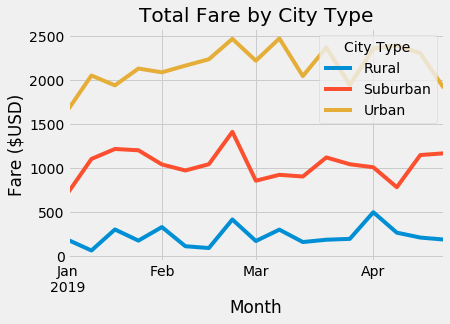

<Figure size 1080x360 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [443]:
# Object-oriented interfact method to plot dataframe

final_april_table_df.plot()
plt.title("Total Fare by City Type")
plt.xlabel('Month')
plt.ylabel('Fare ($USD)')
plt.figure(figsize=(15, 5))
plt.style.use('fivethirtyeight')

plt.show()
plt.savefig("analysis/TotalFareCityTypeChallenge.png")